# Table of Contents

1. [Introduction](#Introdcution)
1. a. [Configuration](#Configuration)
1. b. [Import data](#Import-data)
2. [Questions](#Questions)
3. [Question #1: The producers](#Question-#1:-The-producers)
3. a [The producers: channel info](#Channel-info)
3. b [The producers: video info](#Video-info)
3. c [The producers: recommendations info](#Recommendations-info)
3. d [The producers: topics info](#Topics-info)
4. [Question #2: The users](#2:-The-users)
4. a [Dutch commenters on international channels](#Dutch-commenters-on-international-channels)
4. b [Commenters of specific Dutch channels](#Commenters-of-specific-Dutch-channels)


## Introduction

This notebook is used for the analysis of information networks on YouTube and to make this analysis reproducable. I'll take you step by step through the data and analyses, trying to find angles for stories. You can use the Table of Contents to skip to the relevant parts.

## Configuration

First do some configuration, import libraries and set paths to data. Throughout the Notebook, Python3.6 is used. I'll import all libraries at once.

In [1]:
import pandas as pd #basically the engine for the whole analysis. 
import matplotlib.pyplot as plt #for plotting our data.
import glob #a nice library for iterating through multiple files.
import networkx as nx #we need this to construct and export network graphs.

%matplotlib inline

In [2]:
#set path to NL data - better to set these constants in a separate config file and import them here.

path = '/home/dim/Documents/projecten/extremisme/youtube/yt/YouTubeExtremism/DataCollection/output/NL/'

#set path to control group data

path_c = '/home/dim/Documents/projecten/extremisme/youtube/data/temp/bubble/right/NL/'

#set path to international right data

path_i = '/home/dim/Documents/projecten/extremisme/youtube/data/temp/bubble/right/'

## Import data

Types of data are channels, videos, comments, recommendations and transcripts (for topics). The data are spread over multiple csv's so we have to append them first and create one dataframe for each type of data. We'll write the results to a csv file you can import later.

In [3]:
#import the channel data into a dataframe

channels = pd.read_csv(path + 'channels_nl_right.csv')

In [4]:
#import videofiles into one dataframe

all_files = glob.glob(path + "videos_nl*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
videos = pd.concat(list_, sort=True)

In [5]:
#import comment files into one dataframe

all_files = glob.glob(path + "comments_nl*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
comments = pd.concat(list_, sort=True)

In [6]:
#import recommendations files into one dataframe

all_files = glob.glob(path + "recommendations*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
recommendations = pd.concat(list_, sort=True)

In [7]:
#import transcripts files into one dataframe

all_files = glob.glob(path + "transcripts*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in all_files:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
transcripts = pd.concat(list_, sort=True)

### Load data from control group

We want to compare the results from the NL right information network with other networks. For instance, we want to compare the behavior of certain political parties (in the Netherlands Forum voor Democratie and the PVV) with centre and left wing parties. 

In [8]:
#import videos still TODO:

#import comments still TODO:

#import recommendations still TODO:

#import transcripts still TODO:

## Questions

So we're all set up. Before we dive in, what kind of questions do we want to answer? 

1. What kind of content is being watched by Dutch viewers? (The producers)
2. Who is commenting on the videos in the far right information network? How are commenters interacting? (The users)
3. How do political parties compare in terms of content, marketing strategies and reach? (Comparisson and strategies)
4. How does the far right information network compare to other information networks (like far left and center)? (Whataboutism)
5. What content is harmful, hateful, or illegal, in other words, when are lines being crossed? (Morality, the Platform)


### Question #1: The producers

For this we need:
1. Statistics on videos, channels and recommendations.
2. Topics of videos (by tags or through topic modelling)

Let's start by looking at the channels.

#### Channel info

In [9]:
#general info

channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
channel_id                   56 non-null object
channel_title                56 non-null object
channel_description          31 non-null object
channel_default_language     56 non-null object
channel_country              56 non-null object
channel_uploads              56 non-null object
channel_viewcount            56 non-null int64
channel_commentcount         56 non-null int64
channel_subscribercount      56 non-null int64
channel_videocount           56 non-null int64
channel_topic_ids            56 non-null object
channel_topic_categories     56 non-null object
channel_branding_keywords    56 non-null object
dtypes: int64(4), object(9)
memory usage: 5.8+ KB


So there are 56 channels, 31 of which have a description. If you want to have a quick look at the channels, use this code: channels.channel_title.tolist().

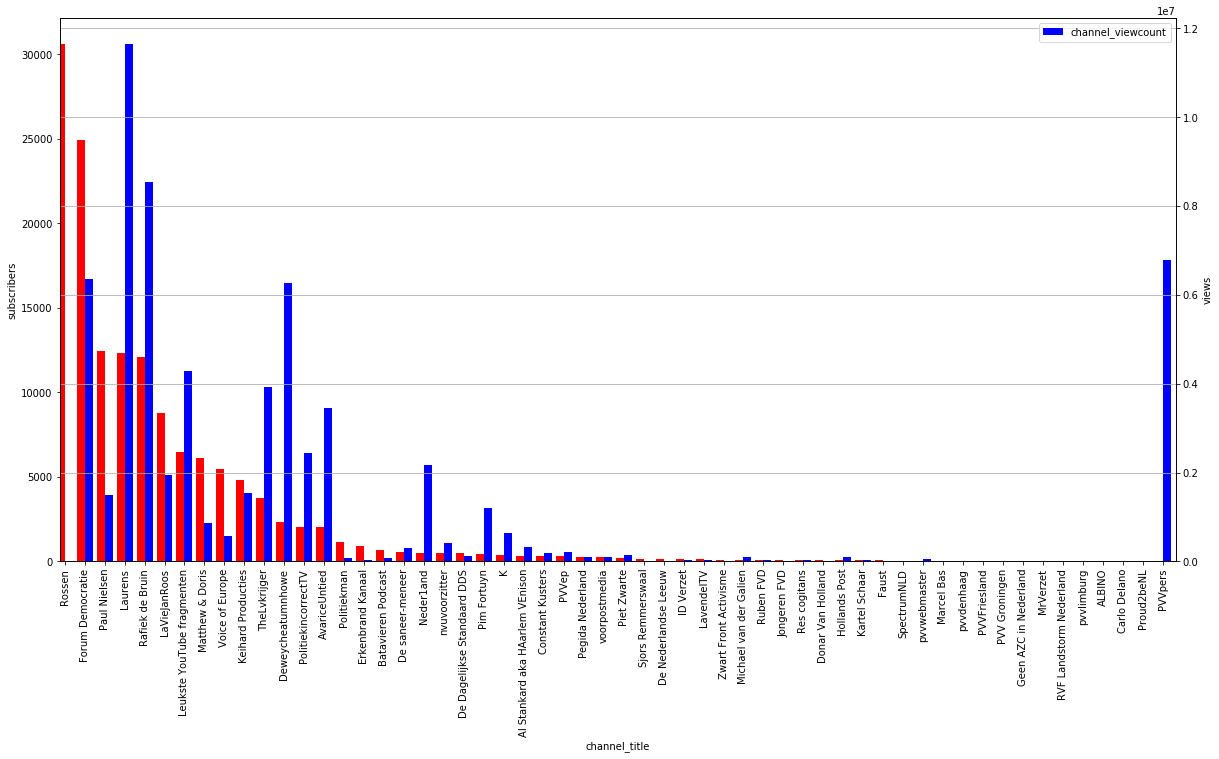

In [10]:
#let's plot the channels' subscriptions and views

stats = channels[['channel_title', 
                  'channel_description', 
                  'channel_subscribercount',
                  'channel_viewcount', 
                  'channel_videocount']]

stats = stats.sort_values(by='channel_subscribercount', ascending=False)
stats.set_index("channel_title",drop=True,inplace=True)

fig = plt.figure(figsize=(20,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

stats.channel_subscribercount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
stats.channel_viewcount.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, legend=True, grid=True)
ax.set_ylabel('subscribers')
ax2.set_ylabel('views')

plt.show()

Be careful, because there are two y-axis. The left is subscribers, the right is viewcount. 

That said though, there are some takeaways and questions:
1. PVVpers has 0 subscribers. That means that the subscribercount has not been given on the channel page. They have a lot of viewers. Still more than Forum voor Democratie, but FvD is catching up. PVV is much older.
2. Some channels generate a lot of views, like Laurens, Rafiek de Bruin, Leukste YouTube Fragmenten, Deweycheatumhowe and the LvKrijger. Most of them are very pro FvD and pro PVV.
3. FvD has relatively many subscribers (they rank 2nd), but not that many views (relitavely, they rank 4th). Did they buy subscribers? 
4. Why did Rossen remove all his videos? He was quite popular.
5. If we look at FvD more broadly and take affiliated channels into consideration, FvD is very big.

#### Video info

In [11]:
#get some basics

videos['video_published'] = pd.to_datetime(videos['video_published'])
videos['video_upload_year'] = pd.DatetimeIndex(videos['video_published']).year

In [12]:
# get some data per year

uploads_per_year = videos.groupby(['video_upload_year']).size()
views_per_year = videos.groupby(['video_upload_year'])['video_view_count'].agg('sum')

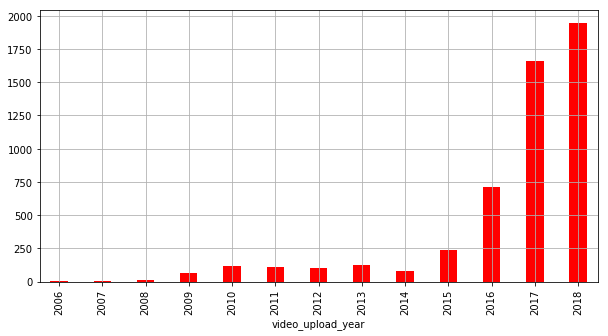

In [13]:
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

uploads_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of videos published')
ax.set_xlabel('year')

plt.show()


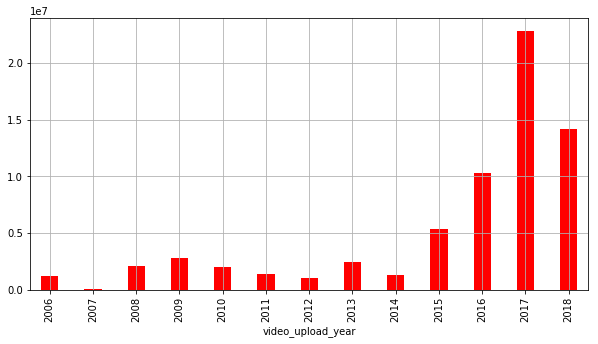

In [14]:
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

width = 0.4

views_per_year.plot(kind='bar', color='red', width=width, grid=True)
ax.set_ylabel('number of views')
ax.set_xlabel('year')

plt.show()

Interesting:

1. In 2018 more videos were uploaded, but they've gotten significantly lesser views. It could be that older video's are still getting views. 

In [15]:
#let's compare some channels

channel1 = 'Forum Democratie' #fill in the channels you want to compare
channel2 = 'PVVpers'

filtered = videos.loc[(videos['video_channel_title'] == channel1) | \
                      (videos['video_channel_title'] == channel2)
                     ]

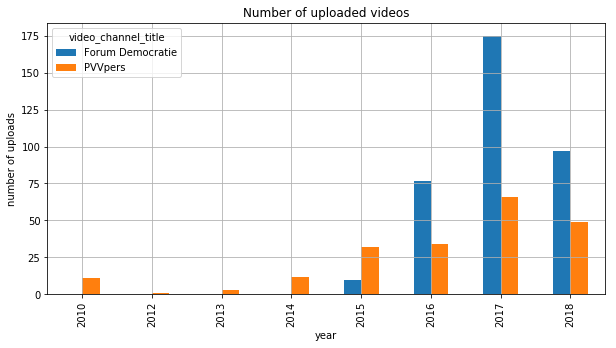

In [16]:
#first look at the number of published videos per year

ax = filtered.groupby(['video_upload_year','video_channel_title'])['video_channel_title'] \
        .count().unstack(1).plot.bar(title="Number of uploaded videos", figsize=(10,5), grid=True)

ax.set_xlabel('year')
ax.set_ylabel('number of uploads')

plt.show()

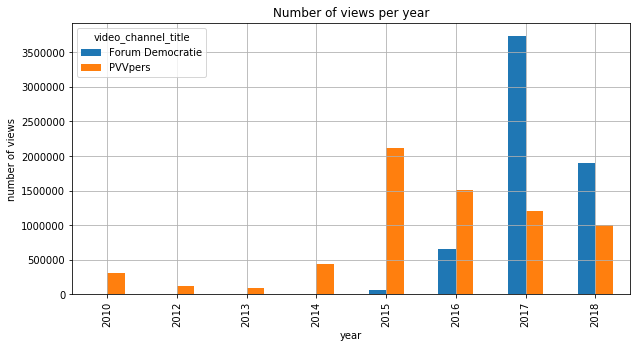

In [17]:
#now look at the viewcount per year

import numpy as np
ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .sum().unstack(1).plot.bar(title="Number of views per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

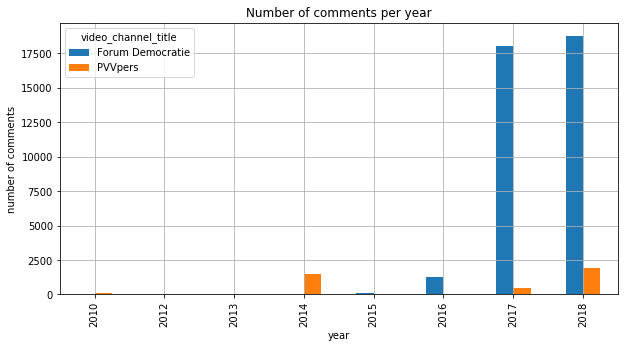

In [18]:
#and the comment count per year

import numpy as np
ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_comment_count'] \
        .sum().unstack(1).plot.bar(title="Number of comments per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of comments')

plt.show()

Some takeaways from the comparison of PVV and FvD:
1. FvD is winning on YouTube, by a large margin.
2. They are much more active in uploading content
3. That content reaches a larger audience. TODO: to be sure we need to look at the average views per video.
4. It's clear that there is much more debate, or at least more comments on FvD than on PVV.

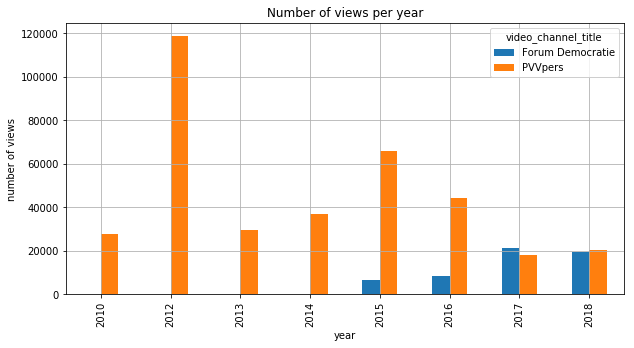

In [19]:
#looking at the mean of viewcount per video

#now look at the viewcount per year

import numpy as np
ax = filtered.groupby(['video_upload_year', 'video_channel_title'])['video_view_count'] \
        .mean().unstack(1).plot.bar(title="Number of views per year", figsize=(10,5), grid=True, legend=True)

ax.set_xlabel('year')
ax.set_ylabel('number of views')

plt.show()

I still want to have a good look at it, but it seems that the mean views per video is about the same.

#### Recommendations info

The channel data for the recommendations is missing, so we need to add them and merge them with the recommendations and the videos. While we are at it, let's use a simpler variable.

In [20]:
#normalize field names (this will be fixed in future versions of the DataCollection library)

recommendations = recommendations.rename(columns={'channelId':'channel_id',
                                                  'description': 'target_channel_description',
                                                  'publishedAt': 'target_video_published',
                                                  'targetVideoId': 'target_video_id',
                                                  'title': 'target_video_title',
                                                  'videoId': 'source_video_id' })

video_channels = pd.merge(videos, channels, on='channel_id', how='left')

video_channels = video_channels.rename(columns={'channel_id': 'source_channel_id',
                                                'video_category_id': 'source_video_category_id',
                                                'video_channel_title': 'source_channel_title',
                                                'video_description': 'source_video_description',
                                                'video_id': 'source_video_id',
                                                'video_published': 'source_video_published',
                                                'video_tags': 'source_video_tags',
                                                'video_title': 'source_video_title',
                                                'video_view_count': 'source_video_viewcount',
                                                'channel_topic_ids': 'source_channel_topic_ids',
                                                'channel_subscribercount': 'source_channel_subscribercount'})

recs_chans = pd.read_csv(path + 'recs_chans.csv')
recs_channels_for_merge = pd.merge(recommendations, recs_chans, on='channel_id', how='left')

recs_channels_for_merge = recs_channels_for_merge.rename(columns={'channel_id': 'target_channel_id',
                                                                 'channel_title': 'target_channel_title',
                                                                 'channel_description': 'target_channel_description',
                                                                 'channel_viewcount': 'target_channel_viewcount',
                                                                 'channel_subscribercount': 'target_channel_subscribercount',
                                                                 'channel_topic_ids': 'target_channel_topic_ids'})

recs = pd.merge(recs_channels_for_merge, video_channels, on='source_video_id', how='left')

recs = recs.drop(['channel_country_x',
                  'channel_default_language_x',
                  'channel_uploads_x',
                  'channel_commentcount_x',
                  'channel_videocount_x',
                  'channel_topic_categories_x',
                  'channel_branding_keywords_x',
                  'video_comment_count',
                  'video_default_language',
                  'video_dislikes_count',
                  'video_duration',
                  'video_likes_count',
                  'video_upload_year',
                  'channel_title',
                  'channel_viewcount',
                  'channel_country_y',
                  'channel_commentcount_y',
                  'channel_uploads_y',
                  'channel_viewcount',
                  'channel_branding_keywords_y',
                  'channel_topic_categories_y',
                  'channel_videocount_y',
                  'video_topic_categories',
                  'video_topic_ids',
                  'channel_default_language_y',
                  'channel_description'
                 ], axis=1)

recs = recs.rename(columns={'source_video_title_y': 'source_video_title'})


cols = ['source_video_id',
        'source_video_title',
        'source_video_description',
        'source_video_published',
        'source_video_tags',
        'source_video_viewcount',
        'source_channel_id',
        'source_video_category_id',
        'source_channel_title',
        'source_channel_subscribercount',
        'source_channel_topic_ids',
        'target_video_id',
        'target_video_title',
        'target_channel_id',
        'target_channel_description',
        'target_video_published',
        'target_channel_title',
        'target_channel_description',
        'target_channel_viewcount']

recs = recs[cols]
         
         

In [21]:
recs.sample(20)

,source_video_id,source_video_title,source_video_description,source_video_published,source_video_tags,source_video_viewcount,source_channel_id,source_video_category_id,source_channel_title,source_channel_subscribercount,...,target_video_id,target_video_title,target_channel_id,target_channel_description,target_channel_description,target_video_published,target_channel_title,target_channel_description,target_channel_description,target_channel_viewcount
75105,k5iju71U45M,Begrotingscapaciteit voor de eurozone - Bijdra...,NaN,2017-02-14 14:30:13,"['Auke Zijlstra', 'PVV Europa', 'Eurozone']",32,UCiZh4VY5uOMbTNyOpPGpPBg,25,PVVep,324,...,pGN--91HFdw,Presentatie van het werkprogramma van het Oost...,UCiZh4VY5uOMbTNyOpPGpPBg,NaN,NaN,2018-07-04T11:25:06.000Z,PVVep,NaN,NaN,205014
40065,Ns5zMI1yZU0,Baudet vs Ollongren over opheffen gemeente Har...,De overgrote meerderheid van de inwoners van d...,2018-04-18 10:55:19,"['Thierry Baudet', 'FVD', 'Forum voor Democrat...",25163,UC9H9K7oSpte0uWBofdW4UiA,25,Forum Democratie,24926,...,EyvsBcgMPBQ,Wilders(PVV) v Baudet(FvD): 'Het is altijd goe...,UCmKZ8YsDDTz5woa1sOOD4XQ,Wilders(PVV) v Baudet(FvD): 'Het is altijd goe...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,2018-02-23T09:27:20.000Z,Rafiek de Bruin,Wilders(PVV) v Baudet(FvD): 'Het is altijd goe...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,8570142
162040,QBtw0DGS_qg,Kops(PVV) sluit leuk af met het woord ''kwakke...,Kops(PVV) sluit leuk af met het woord ''kwakke...,2018-03-06 09:50:32,"['politiek', 'npo', 'nos', 'npo politiek', 'tw...",2718,UCmKZ8YsDDTz5woa1sOOD4XQ,25,Rafiek de Bruin,12096,...,OR6bJ7Fdh-0,Moorlag(PvdA) lokt Baudet(FvD) uit over de Bre...,UCmKZ8YsDDTz5woa1sOOD4XQ,Moorlag(PvdA) lokt Baudet(FvD) uit over de Bre...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,2018-04-12T13:03:22.000Z,Rafiek de Bruin,Moorlag(PvdA) lokt Baudet(FvD) uit over de Bre...,Welkom op mijn kanaal!\n-----\nPlatform voor d...,8570142
25440,-qDjE_por1s,"NOVEL RELEASE: DEATHTOTHEWRLD, an interracial ...",In this video I offer my analysis of Stefan Mo...,2016-10-04 11:19:10,"['acidright', 'interracial', 'racist', 'novel'...",185,UCqYOaeCgqM7YM_qkP3qXUbA,29,Al Stankard aka HAarlem VEnison,347,...,laEOIaQjc-U,The Daily Beast's Dishonesty,UCqYOaeCgqM7YM_qkP3qXUbA,NaN,#TheRainbowPill of Al Stankard aka HAarlem VEn...,2018-06-30T15:15:40.000Z,Al Stankard aka HAarlem VEnison,NaN,#TheRainbowPill of Al Stankard aka HAarlem VEn...,322995
107673,QDwjTyQfbkk,"PPC #3: Luisteraarsvragen, Roger Scruton, Timm...",De derde Perry-Pod-Column! De maandelijkse lui...,2018-08-31 14:00:07,"['Perry', 'Pierik', 'Perry Pierik', 'Jurriaan'...",268,UCG5MbIZ60hfKazU-8N9wg2A,25,Batavieren Podcast,657,...,vpkONCjtaOI,"PPC #4: Luisteraarsvraag, Juncker's Speech en ...",UCG5MbIZ60hfKazU-8N9wg2A,De vierde Perry-Pod-Column! De maandelijkse lu...,Welkom bij de Batavieren! Podcast over politie...,2018-09-28T03:47:05.000Z,Batavieren Podcast,De vierde Perry-Pod-Column! De maandelijkse lu...,Welkom bij de Batavieren! Podcast over politie...,81881
2720,0Rt6J_aB9q0,"Dream Machine - ""Run of the Mill""","Dream Machine ""Run of the Mill"" \noff the new ...",2017-09-21 07:14:33,"['dream machine', 'band gets dropped', 'austin...",15720,UC8OBnJUEFB3bs6mF5ulwpdA,10,Matthew & Doris,6104,...,NCtzkaL2t_Y,The Beatles - Don't Let Me Down,UC4dqLAF7yT-_DqeYisQ001w,The Beatles 1 Video Collection is out now. Ava...,"The Beatles on Vevo - Official Music Videos, L...",2015-12-07T16:42:02.000Z,TheBeatlesVEVO,The Beatles 1 Video Collection is out now. Ava...,"The Beatles on Vevo - Official Music Videos, L...",937971213
174685,iv8_jXyWhx4,Hiddema(FvD) tegen Özturk(DENK): 'Wat is er?! ...,Hiddema(FvD) tegen Özturk(DENK): 'Wat is er?! ...,2017-12-23 10:31:55,"['politiek', 'npo', 'nos', 'npo politiek', 'tw...",179602,UCmKZ8YsDDTz5woa1sOOD4XQ,25,Rafiek de Bruin,12096,...,FUauWOJJfpQ,Hiddema bij Business Class: Stop de Marrakesh ...,UC9H9K7oSpte0uWBofdW4UiA,Theo Hiddema was vandaag te gast bij Business ...,Foru

In [22]:
#how many videos and recommendations are in this set?
len(recs)

221704

In [23]:
#a quick reminder of the channels

recs.source_channel_title.unique()

array(['Matthew & Doris', 'De saneer-meneer', 'Politiekman', 'Faust',
       'ALBINO', 'Deweycheatumnhowe', 'Al Stankard aka HAarlem VEnison',
       'Sjors Remmerswaal', 'Marcel Bas', 'De Nederlandse Leeuw',
       'AvariceUntied', 'Forum Democratie', 'PVVpers', 'LaVieJanRoos',
       'PVVFriesland', 'PVVep', 'pvvlimburg', 'PVV Groningen',
       'pvvwebmaster', 'pvvdenhaag', 'Erkenbrand Kanaal', 'Proud2beNL',
       'Neder1and', 'RVF Landstorm Nederland', 'Pegida Nederland',
       'nvuvoorzitter', 'Geen AZC in Nederland', 'Piet Zwarte',
       'LavendelTV', 'Keihard Producties', 'Kartel Schaar',
       'Jongeren FVD', 'K', 'SpectrumNLD', 'Ruben FVD', 'Laurens',
       'Batavieren Podcast', 'PolitiekincorrectTV', 'Voice of Europe',
       'De Dagelijkse Standaard DDS', 'Michael van der Galien',
       'Pim Fortuyn', 'MrVerzet', 'Carlo Delano', 'Rafiek de Bruin',
       'Donar Van Holland', 'TheLvkrijger', 'ID Verzet',
       'Constant Kusters', 'voorpostmedia', 'Zwart Front Activisme

In [24]:
#pick a channel

chan = 'Erkenbrand Kanaal' #fill in a channel here

#and filter

filtered_recs = recs[recs['source_channel_title'] == chan]

In [25]:
#see the related channels of the videos and how often YouTube has assigned these related channels

filtered_recs.target_channel_title.value_counts()

Erkenbrand Kanaal                      794
Millennial Woes                         69
Red Ice TV                              53
American Renaissance                    26
GeenStijl                               25
Omroep PowNed                           17
De Telegraaf                            17
TEDx Talks                              14
Stefan Molyneux                         11
The Golden One                          11
ijzerwakevzw                             9
RTL Z                                    9
The Crypto Sniper                        9
Monokulttuuri FM                         8
Al Stankard aka HAarlem VEnison          8
CrashCourse                              7
Studium Generale Delft                   6
Universiteit van Nederland               6
CBS News                                 5
Kassa                                    5
RTV Rijnmond                             5
YaleCourses                              5
Rafiek de Bruin                          5
Zonwending 

In [26]:
#write to gefx file

G = nx.from_pandas_edgelist(recs, source='source_channel_title', target='target_channel_title')
nx.write_gexf(G, path + 'nl_graphs/nl_recommendations.gexf' )

In [27]:
#filter out videos of a selected channel

vid = 'Conference interview with Millennial Woes [2018 ENGLISH]' #change this to another video title

filtered_rec_vids = filtered_recs[filtered_recs['source_video_title'] == vid]

In [28]:
#or pick another video of this list list of vids of selected channel

filtered_recs.source_video_title.unique()

array(['Poëzie: Ernst Moritz Arndt',
       'Conference interview with Frodi Midjord [2018 ENGLISH]',
       'Poetry Podcast: introduction to European poetry [ENGLISH]',
       'Conference interview with George Hutcheson [2018 ENGLISH]',
       'Conference interview with Millennial Woes [2018 ENGLISH]',
       'Poëzie: William Blake',
       "The Golden One's speech at the Erkenbrand Autumn Festival [2017 ENGLISH]",
       'Veranderingen - Icarus (Cover door Flatlander)',
       'On the Shoulders of Giants: Erkenbrand Conference 2018 [ENGLISH]',
       'BoerRepubliek podcast [English] talking about South Africa',
       '16e IJzerwake 2017',
       'Erkenbrandpunt Telegramkanaal: De Nieuwshoorn',
       'Erkonomie 3: Woeker', 'Sam Spreekt 3 - Verslagen in Friesland',
       'Erkonomie 2: Muntenunies. De Euro en EU',
       'Erkonomie 1: kritiek op het huidige monetaire systeem.',
       'Sam Spreekt 2 - antwoorden op Zonwending en NRM',
       'Erkenbrandpunt week 16', 'Wat is "racisme

In [29]:
filtered_rec_vids.target_video_title.tolist()

['Millennial Woes and Hate Facts',
 'The Virus of Informality',
 'Why people believe they can’t draw - and how to prove they can | Graham Shaw | TEDxHull',
 'What the Founders Really Thought About Race',
 'The Man Who Stole $65 Billion - Largest Ponzi Scheme In History',
 'How to Look Good in Skype Interviews - Tips & Training',
 'What a 15-year-old meth addict taught me about leadership | Brian Fretwell | TEDxBoise',
 'Ben Shapiro DESTROYS Yale Snowflakes In Epic Q And A',
 'The Pursuit Of Happyness - Job Interview',
 'How to know your life purpose in 5 minutes | Adam Leipzig | TEDxMalibu',
 'Baby Boomers vs. Millennials',
 'Race & IQ - Demographic Effects on National High IQ',
 'Poetry Podcast: introduction to European poetry [ENGLISH]',
 'Fernando Cortés: "Massive Mexican Immigration—a Business of Crooks"',
 'The Baby Boomers - Millennial Woes',
 '5 techniques to speak any language | Sid Efromovich | TEDxUpperEastSide',
 'Millennials in the Workforce, A Generation of Weakness - Simo

#### Topics info

This still needs some work. The tags are malformed, and I'm not so sure about the quality of the transcripts. I would say this doens't have a high priority, so I'll leave this to later and focus on the users first.

In [ ]:
#extract tags, first link tags to videos and clean them up a bit

vidtags = videos[['video_id', 'video_title', 'video_tags']]

vidtags = vidtags.video_tags.str.split(', | #', expand=True)\
    .merge(vidtags, left_index = True, right_index = True)\
    .drop(['video_tags'], axis=1)\
    .melt(id_vars = ['video_id'], value_name = "tags") \
    .dropna() \
    .drop(['variable'], axis=1)

vidtags['tags'].replace(regex=True,inplace=True,to_replace=r"'|\[|\]|#|\"",value=r'')

vidtags.tags = vidtags.tags.str.lower()

vidtags = vidtags[vidtags.tags != 'not set']


In [ ]:
#look for certain tags

vidtags = vidtags[vidtags['tags'].str.contains("rassenhaat")]
vidtags.tags.unique()


In [ ]:
#then get the video data with these tags.

vidtags = pd.merge(vidtags, videos, on='video_id', how='left')
vidtags[['video_id', 'tags', 'video_channel_title_x']]

### Question #2: The users

Who is commenting on the videos in the far right information network? How are commenters interacting? (The users)

In [ ]:
allFiles = glob.glob(path + "comments_nl_right*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
comments = pd.concat(list_, sort=True)

In [30]:
#how many comments do we have?

len(comments)

196344

First I'm interested in some statistics to get to the hardcore commenters

In [31]:
comments.columns

Index(['author_channel_id', 'author_channel_url', 'author_display_name',
       'comment_dislike_count', 'comment_id', 'comment_like_count',
       'comment_text', 'comment_time', 'reply_count', 'video_id'],
      dtype='object')

In [32]:
#number of unique author names

comments.author_display_name.nunique()

52335

In [33]:
#number of unique author id's

comments.author_channel_id.nunique()

53653

So we have to be a bit careful, because there are more unique id's than names, which is kind of obvious.

In [34]:
#I'll use display name for now because it's easier to navigate the data, 
#but a final check has to be made in the end

comments.author_display_name.value_counts()

PolitiekincorrectTV                   2236
Paul Nielsen                          1144
Peter Chess                            996
Deplorable Data                        845
Nayako Sadashi                         785
demarcation                            621
Peter-john De Jong                     583
ivar olsen                             574
Milo Overzicht                         553
groene hond                            504
er zaal                                499
jhon jansen                            448
Baiko E                                380
Politiekman                            356
-____-                                 342
Chris Veenendaal                       299
Oma met lekker kontje                  288
Brummie Brink                          288
Pagan Cloak                            286
reindeerkid                            286
NDY                                    276
Vijnana Dasa                           272
Karel de Kale                          272
top top    

#### Dutch commenters on international channels

I'm interested in exploring how these (mostly) Dutch users are represented in the larger international far right channel network. So I'll make a list of unique id's and run it through the larger corpus.

In [35]:
users_to_check = comments.author_channel_id.unique().tolist()

In [36]:

columns = ['video_id', 
           'comment_id', 
           'comment_id2', 
           'author_display_name',
           'author_image',
           'author_channel_url',
           'author_channel_id',
           'comment_text',
           'number_of_replies',
           'comment_date'
          ]


iter_csv = pd.read_csv(path_i + 'comments_right.csv', iterator=True, chunksize=100000, names=columns)
nl_users_int = pd.concat([chunk[chunk['author_channel_id'].isin(users_to_check)] for chunk in iter_csv])


In [37]:
#merge comments with video and channel data

In [38]:
videos_all = pd.read_csv(path_i + 'videos_right.csv', low_memory=False)

In [39]:
int_vid_comments = pd.merge(nl_users_int, videos_all, on='video_id', how='left')

In [40]:
len(int_vid_comments)

625657

In [41]:
#so this is where people who comment on Dutch channels are commenting in our far right network

int_vid_comments.video_channel_title.value_counts()

Pat Condell                               51414
Rebel Media                               36376
Lauren Southern                           29097
RobinHoodUKIP                             28376
Red Ice TV                                27375
The Iconoclast                            23867
Stefan Molyneux                           23761
Tim Pool                                  19137
Dr. Steve Turley                          18006
Styxhexenhammer666                        16578
Paul Joseph Watson                        15875
Acts17Apologetics                         14333
Tommy Robinson                            14237
Vlad Tepesblog                            13521
Forum Democratie                          11073
PeterSweden                               10195
Timcast                                   10189
Andywarski                                 9429
Millennial Woes                            9406
Gad Saad                                   7963
Brittany Pettibone                      

In [42]:
# let's zoom in on some channels

channel = 'Millennial Woes' #enter the channel name

comments_of_interest = int_vid_comments[int_vid_comments['video_channel_title'] == channel]

comments_of_interest

,video_id,comment_id,comment_id2,author_display_name,author_image,author_channel_url,author_channel_id,comment_text,number_of_replies,comment_date,...,video_tags,video_category_id,video_default_language,video_duration,video_view_count,video_comment_count,video_likes_count,video_dislikes_count,video_topic_ids,video_topic_categories
392431,elt_rXWSSr8,Ugz-uxADuFxynHiJR9p4AaABAg,Ugz-uxADuFxynHiJR9p4AaABAg,Taikkisu Kisunen,https://yt3.ggpht.com/-orRIiFp4SsU/AAAAAAAAAAI...,http://www.youtube.com/channel/UCjir6FO4tZlljV...,UCjir6FO4tZlljVPo7AoQcFQ,It really is a struggle being doxed by hateful...,1.0,2018-01-24T07:15:14.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392432,elt_rXWSSr8,Ugxvti1hvoAf56NvKXh4AaABAg,Ugxvti1hvoAf56NvKXh4AaABAg,AltRight Serbia,https://yt3.ggpht.com/-ClaoVjUCGwA/AAAAAAAAAAI...,http://www.youtube.com/channel/UCAhCrT17O7GVXN...,UCAhCrT17O7GVXNEHYes5tWA,Hail Victory from Serbia!,2.0,2017-12-11T09:56:49.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392433,elt_rXWSSr8,UgwrPa1_brUpvGZErol4AaABAg,UgwrPa1_brUpvGZErol4AaABAg,Kosmos de Kosmopoliet,https://yt3.ggpht.com/-KkSfEMbgwQ0/AAAAAAAAAAI...,http://www.youtube.com/channel/UCtYlTATunfeIZR...,UCtYlTATunfeIZRK5J3088rg,Goddamn that was a powerful game you played ou...,1.0,2017-08-10T09:54:03.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392434,elt_rXWSSr8,UgyoXnDa8AXmYE6FIm14AaABAg,UgyoXnDa8AXmYE6FIm14AaABAg,Philip Smeeton,https://yt3.ggpht.com/-xJ9g314pj9I/AAAAAAAAAAI...,http://www.youtube.com/channel/UCwU2oCr5DcMqJF...,UCwU2oCr5DcMqJFOz_dqhvag,My definition of an intellectual is someone wi...,1.0,2017-08-06T16:44:03.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392435,elt_rXWSSr8,Ugw-_GJxeqzCDg95Rt94AaABAg,Ugw-_GJxeqzCDg95Rt94AaABAg,recynd77,https://yt3.ggpht.com/-uAuuA7IJBoc/AAAAAAAAAAI...,http://www.youtube.com/channel/UCd3KwQN9L-SLak...,UCd3KwQN9L-SLakhVVnTdpCw,"I&#39;m late, but there&#39;s no such thing as...",1.0,2017-08-02T19:20:22.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392436,elt_rXWSSr8,UggCsm4WHvK9vHgCoAEC,UggCsm4WHvK9vHgCoAEC,Man Bro,https://yt3.ggpht.com/-v2oBNuOoE1k/AAAAAAAAAAI...,http://www.youtube.com/channel/UC4SdHr_hmReTHL...,UC4SdHr_hmReTHLZ5WMwpjIg,Don&#39;t speak to me or my son agan,0.0,2017-05-23T03:16:44.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392437,elt_rXWSSr8,UgjsBaHFT3k_aHgCoAEC,UgjsBaHFT3k_aHgCoAEC,r w,https://yt3.ggpht.com/-7MQQwsUI9B0/AAAAAAAAAAI...,http://www.youtube.com/channel/UCe-DG0KOp3_7od...,UCe-DG0KOp3_7od42ubaVRUA,"MW, you still got my support. Anonimity rules ...",1.0,2017-03-07T14:15:02.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392438,elt_rXWSSr8,UgjD2_1CkQ_6h3gCoAEC,UgjD2_1CkQ_6h3gCoAEC,wakeupscreaming,https://yt3.ggpht.com/-r-h6eMpIKis/AAAAAAAAAAI...,http://www.youtube.com/channel/UC3gET90FTWL-22...,UC3gET90FTWL-228TPWEKWmg,Just FYI: Since being on Youtube for almost 12...,0.0,2017-03-04T10:18:06.000Z,...,"['alt-right', 'daily record', 'daily mirror', ...",25,not set,PT2M21S,63695,764,3411,70,"['/m/098wr', '/m/098wr']",['https://en.wikipedia.org/wiki/Society']
392439,elt_rXWSSr8,UghQALdCpzgllXgCoAEC,UghQALdCpzgllXgCoAEC,ivan55599,https://yt3.ggpht.com/-0l72MQGVB4E/AAAAAAAAAAI

My impression is that the data are skewed because of Voice of Europe. We can collect more specific data if we want. Let's select one or more Dutch channels first.

#### Commenters of specific Dutch channels

In [45]:
#first merge the comments with the videos

nl_comment_sphere = pd.merge(comments, videos['channel_title', 'video_id', on='video_id', how='left')

In [46]:
#a reminder of the available channels: TODO: Erkenbrand seems to be missing. I need to investigate

nl_comment_sphere.video_channel_title.value_counts()

Rafiek de Bruin                    38356
Forum Democratie                   28030
Paul Nielsen                       20308
Leukste YouTube fragmenten         15884
Laurens                            15269
TheLvkrijger                       14008
LaVieJanRoos                       10985
Deweycheatumnhowe                   9955
PolitiekincorrectTV                 8857
AvariceUntied                       7178
Voice of Europe                     5865
Matthew & Doris                     4660
Keihard Producties                  3377
PVVpers                             3178
Pim Fortuyn                         2355
Al Stankard aka HAarlem VEnison     1881
Politiekman                         1199
K                                    935
Piet Zwarte                          614
De saneer-meneer                     485
Batavieren Podcast                   484
PVVep                                470
De Dagelijkse Standaard DDS          382
Hollands Post                        353
voorpostmedia   

In [90]:
dutch_chan = 'Forum Democratie' #select dutch channels

commenters_of_interest = nl_comment_sphere[nl_comment_sphere['video_channel_title'] == dutch_chan]
commenters_of_interest = commenters_of_interest.author_channel_id.tolist()

In [91]:
columns = ['video_id', 
           'comment_id', 
           'comment_id2', 
           'author_display_name',
           'author_image',
           'author_channel_url',
           'author_channel_id',
           'comment_text',
           'number_of_replies',
           'comment_date'
          ]


iter_csv = pd.read_csv(path_i + 'comments_right.csv', iterator=True, chunksize=100000, names=columns)
nl_users_int = pd.concat([chunk[chunk['author_channel_id'].isin(commenters_of_interest)] for chunk in iter_csv])


In [92]:
len(nl_users_int)

44336

In [94]:
videos_all = pd.read_csv(path_i + 'videos_right.csv', low_memory=False)

In [95]:
int_vid_comments = pd.merge(nl_users_int, videos_all, on='video_id', how='left')

In [96]:
#dus dit is waar de mensen die onder FvD reageren nog meer reageren (in onze dataset)

int_vid_comments.video_channel_title.value_counts()

Forum Democratie                11052
Pat Condell                      2995
Lauren Southern                  2086
Stefan Molyneux                  1635
Rebel Media                      1398
Tim Pool                         1210
RobinHoodUKIP                    1210
Red Ice TV                       1075
Vlad Tepesblog                   1072
Paul Joseph Watson                978
Styxhexenhammer666                899
The Iconoclast                    879
Tommy Robinson                    799
Andywarski                        754
Acts17Apologetics                 720
Dr. Steve Turley                  669
DENK TV                           608
Millennial Woes                   571
The Golden One                    558
Count Dankula                     500
Timcast                           494
Gad Saad                          469
PeterSweden                       468
RockingMrE                        439
Sargon of Akkad Live              423
Brittany Pettibone                403
The Daily Wi

In [97]:
int_vid_comments.to_csv(path + 'commenters_fvd.csv')

In [ ]:
# merge comments with videos

comments = pd.merge(comments, videos, on='video_id', how='left')

In [ ]:
forum = comments[comments['video_channel_title'].isin(['Forum Democratie',
                                                       'Leukste YouTubeFragmenten',
                                                       'Paul Nielsen',
                                                       'Leukste YouTube fragmenten',
                                                       'Res cogitans',
                                                       'Laurens',
                                                       'LavendelTV',
                                                       'Kartel Schaar',
                                                       'Jongeren FVD'                                 
                                                       ])]

In [ ]:
#prepare comments for graph, method 1

comments_for_graph = comments[['author_display_name', 'video_channel_title', 'comment_time']]

In [ ]:
comments_for_graph = comments_for_graph.rename(columns={'author_display_name': 'Source', 
                                                        'video_channel_title': 'Target',
                                                        'comment_time': 'Start'
                                                       })

In [ ]:
comments_for_graph['Type'] = 'directed'
comments_for_graph['End'] = comments_for_graph['Start']

In [ ]:
comments_for_graph.to_csv(path + 'comments_graph.csv', index=None)

In [ ]:
# prepare comments for graph, method 2

import networkx as nx

In [ ]:
comments.columns

Edges:
1. Source: author_display_name
2. Target: video_title
3. Type: directed
4. Start: comment_time
5. End: comment_time


Nodes:
1. Targets: video_channel_title, video_view_count, video_category_id, video_likes_count, video_tags


In [ ]:
comments_for_graph = comments[['author_display_name', 
                               'video_title', 
                               'comment_time', 
                               'video_channel_title',
                               'video_view_count',
                               'video_category_id',
                               'video_likes_count',
                               'video_tags']]

In [ ]:
comments_for_graph = comments_for_graph.rename(columns={'author_display_name': 'Source',
                                                        'video_title': 'VideoTitle',
                                                        'comment_time': 'Start',
                                                        'video_channel_title': 'Target',
                                                        'video_view_count': 'ViewCount',
                                                        'video_category_id': 'Categories',
                                                        'video_tags': 'Tags'})

In [ ]:
comments_for_graph['Type'] = 'directed'
comments_for_graph['End'] = comments_for_graph['Start']

In [ ]:
G = nx.from_pandas_edgelist(comments_for_graph, source='Source', target='Target', edge_attr=['Type', 'Start', 'End'])


In [ ]:

nodes1 = comments_for_graph[['Source', 'Start']]
nodes1 = nodes1.rename(columns={'Source':'Id'})

In [ ]:
nodes2 = comments_for_graph[['Target', 'VideoTitle', 'ViewCount', 'Categories', 'Tags']]
nodes2 = nodes2.rename(columns={'Target':'Id'})

In [ ]:
frames = [nodes1, nodes2]
nodes = pd.concat(frames, sort=True)

In [ ]:
nodes.head()

In [ ]:
nodes['NodeType'] = nodes['VideoTitle'].where(nodes['VideoTitle'].isnull(), 'video')

In [ ]:
nodes['NodeType'] = nodes.NodeType.fillna(value='commenter')

In [ ]:
comments_for_graph.to_csv(path + 'comments_edges.csv', index=None)

In [ ]:
len(comments_for_graph)

In [ ]:
new_nodes = nodes[['Id', 'VideoTitle', 'ViewCount', 'Tags', 'NodeType']]

In [ ]:
new_nodes = new_nodes.drop_duplicates()

In [ ]:
len(new_nodes)

In [ ]:
new_nodes.to_csv(path + 'comment_nodes.csv', index=False)